# Temperatur in Würzburg

In [1]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──



✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1



── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
data <- read_csv("data/data_OBS_DEU_PT1H_T2M.csv")

Rows: 790288 Columns: 6



── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Produkt_Code
dbl  (3): SDO_ID, Wert, Qualitaet_Byte
dttm (1): Zeitstempel




ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [3]:
head(data)

Warning message:
“One or more parsing issues, see `problems()` for details”


Produkt_Code,SDO_ID,Zeitstempel,Wert,Qualitaet_Byte,Qualitaet_Niveau
<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>
OBS_DEU_PT1H_T2M,2600,2005-03-01 00:00:00,-12.4,4,3
OBS_DEU_PT1H_T2M,2600,2005-03-01 01:00:00,-12.6,6,10
OBS_DEU_PT1H_T2M,2600,2005-03-01 02:00:00,-13.1,1,10
OBS_DEU_PT1H_T2M,2600,2005-03-01 03:00:00,-13.7,1,10
OBS_DEU_PT1H_T2M,2600,2005-03-01 04:00:00,-14.4,1,10
OBS_DEU_PT1H_T2M,2600,2005-03-01 05:00:00,-14.9,1,10


In [4]:
station <- read_csv("data/sdo_OBS_DEU_PT1H_T2M.csv")

Rows: 2 Columns: 6



── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): SDO_Name, Metadata_Link
dbl (2): SDO_ID, Hoehe_ueber_NN




ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [5]:
station

SDO_ID,SDO_Name,Geogr_Laenge,Geogr_Breite,Hoehe_ueber_NN,Metadata_Link
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
5705,Würzburg,99576,497704,268,https://cdc.dwd.de/rest/metadata/station/html/812300016295
2600,Kitzingen,101781,497363,193,https://cdc.dwd.de/rest/metadata/station/html/812300321959


In [6]:
data <- data %>% mutate(SDO_ID = if_else(SDO_ID==2600, "Kitzingen", "Würzburg"))

## Zusammenfassung für Würzburg und Kitzingen

In [7]:
data %>% 
    group_by(SDO_ID) %>%
    summarise(min_Wert = min(Wert), max = max(Wert), mean=mean(Wert)) %>%
    mutate(range = max-min_Wert)

SDO_ID,min_Wert,max,mean,range
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Kitzingen,-20.5,39.4,10.687821,59.9
Würzburg,-23.4,39.3,9.500432,62.7


## Durchschnittstemperatur über die Zeit

In [25]:
library(lubridate)


Attaching package: ‘lubridate’




The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [27]:
data$Zeitstempel[1:5] %>% year

[1] 2005 2005 2005 2005 2005

In [30]:
data <- data %>% mutate(year = year(Zeitstempel))

**In Kitzingen beginnen die Daten im März 2005, der Durchschnitt für 2005 ist also verfälscht**

In [36]:
data %>% filter(SDO_ID == "Kitzingen", year==2005) %>% count(month(Zeitstempel))

month(Zeitstempel),n
<dbl>,<int>
3,744
4,720
5,744
6,720
7,744
8,744
9,720
10,744
11,720


`summarise()` has grouped output by 'SDO_ID'. You can override using the `.groups` argument.



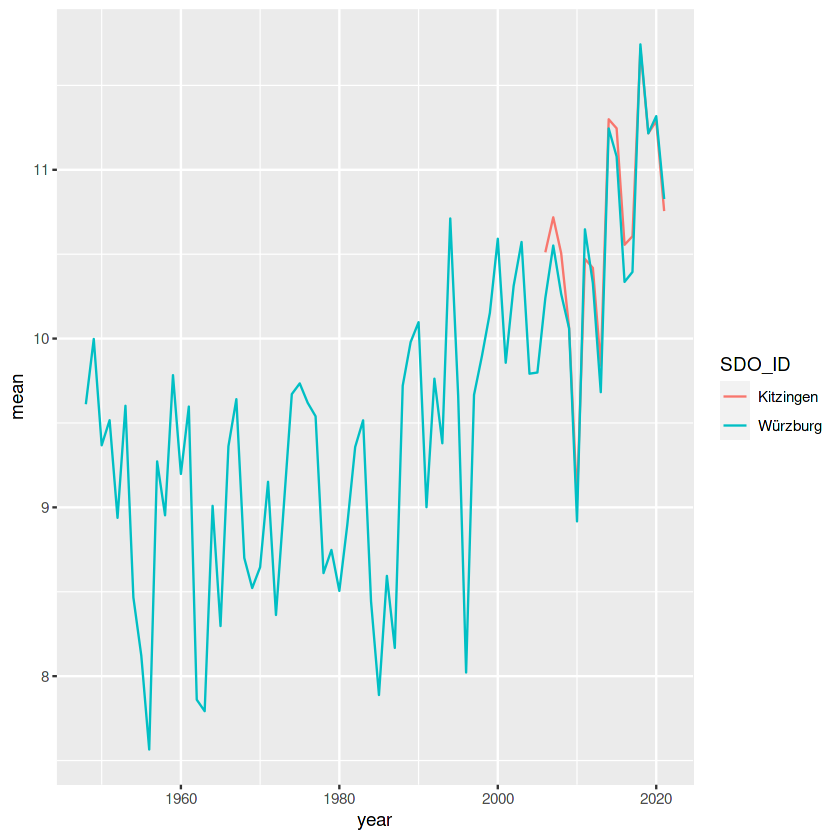

In [39]:
data %>% 
        filter(SDO_ID=="Würzburg" | year > 2005) %>% # ignore Kitzingen 2005 it is incomplete (jan and feb missing)
        group_by(SDO_ID, year) %>%
        summarise(mean=mean(Wert)) %>%
        ggplot(aes(x = year, y = mean, col = SDO_ID)) + geom_line()

## Weitere Ideen

Es gibt noch sehr viele Möglichkeiten für weitere Fragestellungen. Zum Beispiel kann man den erkennbaren Trend in der jährlichen Durchschnittstemperatur versuchen zu modellieren oder allgemein Vorhersagemodelle erstellen und testen.